In [4]:
import random
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x):
    return x * x

def derivative(x):
    return 2 * x

def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i), # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative


def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)] # create a list of indexes
    random.shuffle(indexes) # shuffle them
    for i in indexes: # return the data in that order
        yield data[i]
        
        
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = zip(x, y)
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta



In [13]:
def predict(alpha, x_i, beta):
    return beta * x_i + alpha

num_friends = [50, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12,
               15, 15, 15, 18, 20, 20]
daily_min = [36, 39, 37, 35, 28, 7, 9, 8, 7, 8, 10, 11, 12, 9, 13, 15, 14, 14, 17, 16, 15, 19, 16, 21, 17, 19, 22, 18, 21, 20, 24, 23, 22, 25,
               25, 27, 29, 28, 30, 32]
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,squared_error_gradient,num_friends,daily_min,theta, 0.0001)

In [14]:
print(alpha, beta)

0.8444218515250481 0.7579544029403025


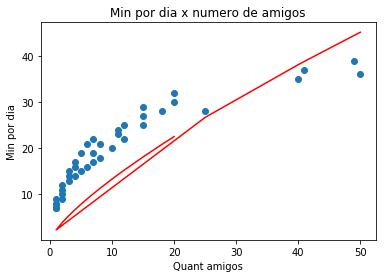

In [15]:
import math
from matplotlib import pyplot as plt
import numpy as np
pred_daily_min = [predict(alpha, beta, i) for i in np.log(num_friends)]
plt.scatter(num_friends, daily_min)
plt.plot(num_friends, np.exp(pred_daily_min), color='red', linestyle='solid')
plt.title("Min por dia x numero de amigos")
plt.xlabel("Quant amigos")
plt.ylabel("Min por dia")
plt.show()